In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.pandas.set_option('display.max_columns', None)

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [3]:
filename = "../input/sms-spam-collection-dataset/spam.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.columns = ['category', 'text']
df.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [5]:
#  Shape of the dataset, and breakdown of the classes
print("Input data has {} rows and {} columns".format(len(df), len(df.columns)))
print("Out of {} rows, {} are spam, {} are ham".format(len(df),len(df[df['category']=='spam']),len(df[df['category']=='ham'])))

Input data has 5572 rows and 2 columns
Out of 5572 rows, 747 are spam, 4825 are ham


Number of null in label: 0
Number of null in text: 0


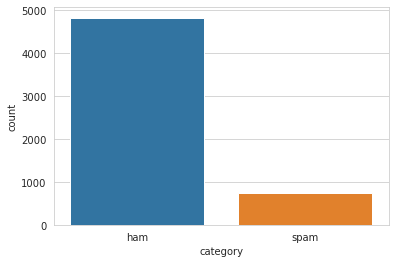

In [6]:
# Missing values in the dataset
print("Number of null in label: {}".format(df['category'].isnull().sum()))
print("Number of null in text: {}".format(df['text'].isnull().sum()))
sns.countplot(x='category', data=df);

## Visualizing Word Clouds

In [7]:
df_ham = df[df['category']=='ham']
df_spam = df[df['category']=='spam']
#convert to list
ham_list=df_ham['text'].tolist()
spam_list= df_spam['text'].tolist()
filtered_spam = ("").join(spam_list) #convert the list into a string of spam
filtered_spam = filtered_spam.lower()
filtered_ham = ("").join(ham_list) #convert the list into a string of ham
filtered_ham = filtered_ham.lower()

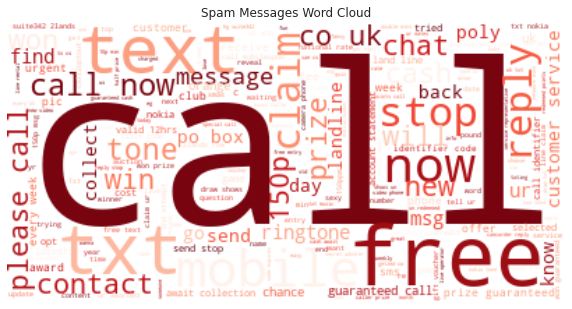

In [8]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_spam)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Spam Messages Word Cloud")
plt.show()

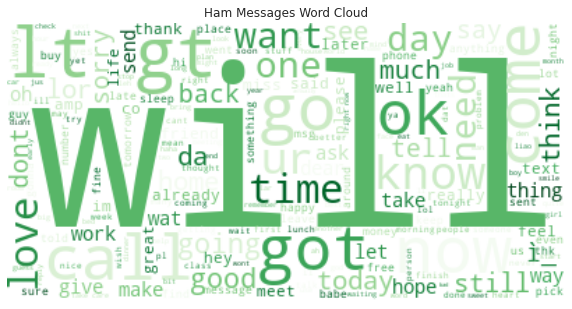

In [9]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_ham)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Ham Messages Word Cloud")
plt.show()

# Preprocessing the data
## Cleaning the text

In [10]:
import string
import re

In [11]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['text'].apply(lambda x: clean_text(x))
df['label'] = df['category'].map({'ham':0, 'spam':1})

### Adding additional features - length of, and percentage of punctuations in the text

In [12]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['text_len'] = df['text'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['text'].apply(lambda x: count_punct(x))
df.head()

,category,text,cleaned_text,label,text_len,punct
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only ...,0,92,9.8
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup fina...,1,128,4.7
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,0,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...,0,49,4.1


## Tokenization

In [13]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,category,text,cleaned_text,label,text_len,punct,tokens
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only ...,0,92,9.8,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0,24,25.0,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup fina...,1,128,4.7,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,0,39,15.4,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...,0,49,4.1,"[nah, i, don, t, think, he, goes, to, usf, he,..."


## Lemmatization and Removing Stopwords

In [14]:
import nltk
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [15]:
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_text'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

,category,text,cleaned_text,label,text_len,punct,tokens,lemmatized_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only ...,0,92,9.8,"[go, until, jurong, point, crazy, available, o...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0,24,25.0,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup fina...,1,128,4.7,"[free, entry, in, a, wkly, comp, to, win, fa, ...",free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,0,39,15.4,"[u, dun, say, so, early, hor, u, c, already, t...",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...,0,49,4.1,"[nah, i, don, t, think, he, goes, to, usf, he,...",nah think go usf life around though


# Feature Extraction from Text
## Bag-Of-Words Model

In [16]:
X = df[['lemmatized_text', 'text_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(5572, 3)
(5572,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3900, 3)
(1672, 3)
(3900,)
(1672,)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_text'])
tfidf_test = tfidf.transform(X_test['lemmatized_text'])

X_train_vect = pd.concat([X_train[['text_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['text_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

text_len  punct    0    1    2    3    4    5    6    7    8    9   10  \
0        32    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1        30   26.7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       129    9.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3       132    3.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4       109    7.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    11   12   13   14   15   16   17   18   19   20   21   22   23   24  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         25   26   27   28   29   30   31   32   33   34   35   36   37   38  \
0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.452986  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    39   40   41   42   43   44   45   46   47   48   49   50   51   52   53  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    54   55   56   57   58   59   60   61   62   63   64   65   66   67   68  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    69   70   71   72   73   74   75   76   77   78   79   80   81   82   83  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    84   85   86        87   88   89   90   91   92   93   94   95   96   97  \
0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.178247  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    98   99  100  101  102  103  104  105  106  107  108  109  110  111  112  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

# Training different Classification models

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1434
           1       0.58      0.83      0.68       238

    accuracy                           0.89      1672
   macro avg       0.77      0.86      0.81      1672
weighted avg       0.91      0.89      0.90      1672



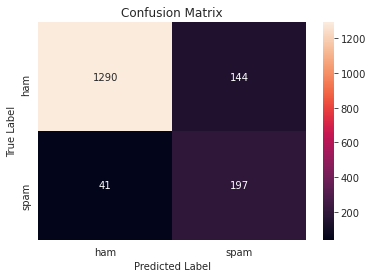

In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1434
           1       0.98      0.84      0.90       238

    accuracy                           0.97      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.97      0.97      1672



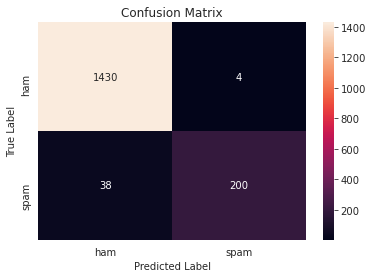

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1434
           1       0.94      0.78      0.86       238

    accuracy                           0.96      1672
   macro avg       0.95      0.89      0.92      1672
weighted avg       0.96      0.96      0.96      1672



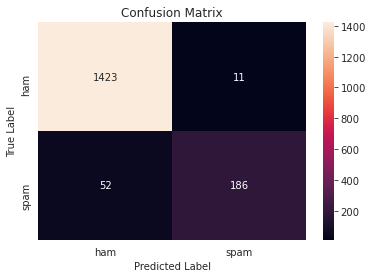

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1434
           1       0.97      0.93      0.95       238

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



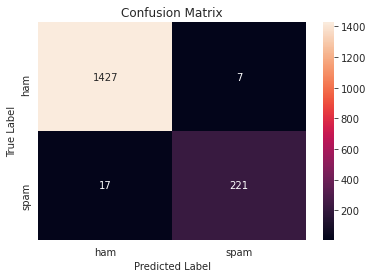

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1434
           1       0.68      0.56      0.62       238

    accuracy                           0.90      1672
   macro avg       0.80      0.76      0.78      1672
weighted avg       0.89      0.90      0.90      1672



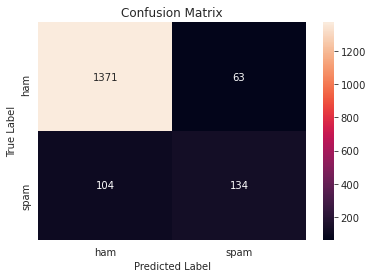

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### The best performing algorithms so far seem to be Linear SVM, Random Forest and Logistic Regression Classifiers.
At this point, it might be worth to perform k-fold cross validation on each of these to estimate their skill on unseen data.

In [25]:
from sklearn.model_selection import cross_val_score

models = [LogisticRegression(), RandomForestClassifier(n_estimators = 150), SVC(kernel = 'linear')]
names = ["Logistic Regression", "Random Forest", "SVM"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")

Logistic Regression
 accuracy - 0.9687179487179487 
 precision - 0.9600817290744456 
 recall - 0.7936862745098039 
 f1 - 0.8677633237175859 
Random Forest
 accuracy - 0.9792307692307693 
 precision - 0.9929480381760338 
 recall - 0.8505882352941179 
 f1 - 0.9121964284130362 
SVM
 accuracy - 0.9820512820512821 
 precision - 0.9804059207449349 
 recall - 0.8800392156862745 
 f1 - 0.9269664722724654 


In [2]:
!pip install tweepy

In [3]:
#Importing Libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#Part-1: Authorization and Search tweets
#Getting authorization
consumer_key = 'p6Fg6WjZeOIQN1FvrsnvCfcbo'
consumer_key_secret = '7sgTYd66QCOoaEDuOXSoH5TkoTJrzmWvjEDnVdIaO7tqZgeGhg'
access_token = '132425188-3pEgCTglpzvYC605OMINgGkn3fO5pTFMv2NfWY61'
access_token_secret = 'Qkzccwwbf6J4Mrpkem4LHVefHxBT13E3C28x0F8gufIyc'
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
user_timeline = api.user_timeline('us election', tweet_mode='extended')
for tweet in user_timeline:
    print(tweet.full_text)

@IndiaToday @amitmalviya @rahulkanwal https://t.co/CYFgJQn2pC
@rahulkanwal @dm_hathras https://t.co/CYFgJQn2pC
@aajtak @anjanaomkashyap https://t.co/CYFgJQn2pC
@Rajendarkumarp @aajtak @anjanaomkashyap https://t.co/CYFgJQn2pC
RT @DurgeshGupta_: @sardanarohit WATCH #HatrasTapes EXPOSE by Arnab Goswami on @Republic_Bharat Tapes allegedly show #Hathras Family BEING…
#DalitLivesMatter #ABPKoMatRoko 
Many vultures had seen the golden opportunity of caste based riots before the Bihar elections. The real pain of these vultures is that they are not being successful. 
Common has always been fooled, still being fooled.
@haribkurup @nestawayhomes @NestAwayCare They are with a very thick skin. No FIR and complaint will work. I tried all the ways.
Only need to publicize their fraudulent activities and let the people know what they do.
Pls check their reviews on Google and Play Store.
@NestAwayCare I don't want any further refund. I will only publicize your calculations as much i can do. Everyone sho

In [7]:
search_words='trump'
date_since = "2020-10-03"
numTweets = 250
numRuns = 6

In [8]:
tweets = tweepy.Cursor(api.search, q=search_words, lang="en", since=date_since, tweet_mode='extended').items(numTweets)

In [10]:
tweet_list = [tweet for tweet in tweets]

In [14]:
noTweets = 0

In [15]:
db_tweets = pd.DataFrame(columns = ['username', 'acctdesc', 'location', 'following',
                                        'followers', 'totaltweets', 'usercreatedts', 'tweetcreatedts',
                                        'retweetcount', 'text', 'hashtags']
                                )

In [16]:
for tweet in tweet_list:
# Pull the values
            username = tweet.user.screen_name
            acctdesc = tweet.user.description
            location = tweet.user.location
            following = tweet.user.friends_count
            followers = tweet.user.followers_count
            totaltweets = tweet.user.statuses_count
            usercreatedts = tweet.user.created_at
            tweetcreatedts = tweet.created_at
            retweetcount = tweet.retweet_count
            
            hashtags = tweet.entities['hashtags']
            
            try:
                text = tweet.retweeted_status.full_text
            except AttributeError:  # Not a Retweet
                text = tweet.full_text            
            
            
            
            
            
            ith_tweet = [username, acctdesc, location, following, followers, totaltweets,
                         usercreatedts, tweetcreatedts, retweetcount, text, hashtags]  
            db_tweets.loc[len(db_tweets)] = ith_tweet
            noTweets += 1

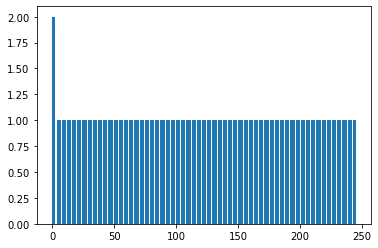

MzRubybaby2003     2
US_1st             2
Resisting_Rebel    2
Karrynation        1
luisaponteortiz    1
                  ..
jojomorris60       1
THE_2Gs            1
warlock320         1
RealDenisGarvey    1
diveshopdave       1
Name: username, Length: 246, dtype: int64


In [17]:
counts = db_tweets["username"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()
print(counts)

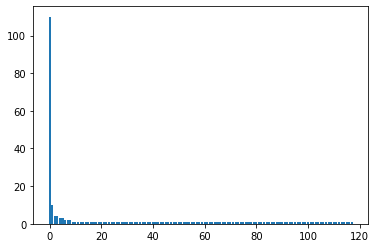

                   110
United States       10
USA                  4
California, USA      4
Canada               3
                  ... 
Trump's America      1
Streamwood, IL       1
Berkeley CA          1
Japan                1
?                    1
Name: location, Length: 118, dtype: int64


In [18]:
counts = db_tweets["location"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()
print(counts)

In [19]:
#Writing tweet dataset ti csv file for future reference
db_tweets.to_csv('tweet_data.csv')

In [21]:
#Defining Search keyword and number of tweets and searching tweets
query = 'COVID-19'
max_tweets = 2000
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]

In [23]:
#Part-2: Sentiment Analysis Report

#Finding sentiment analysis (+ve, -ve and neutral)
pos = 0
neg = 0
neu = 0
for tweet in searched_tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0:
       pos = pos +1
    elif analysis.sentiment[0]<0:
       neg = neg + 1
    else:
       neu = neu + 1
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

Total Positive =  597
Total Negative =  136
Total Neutral =  1267


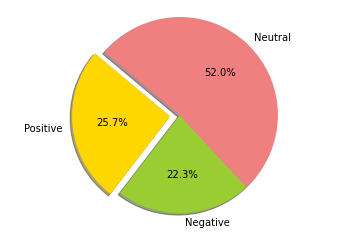

In [24]:
#Plotting sentiments
labels = 'Positive', 'Negative', 'Neutral'
sizes = [257, 223, 520]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [25]:
#Part-3: Creating Dataframe of Tweets

#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
    
with open('tweet_json_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
        
my_demo_list = []
with open('tweet_json_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])
    
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data2.csv')

In [26]:
tweet_dataset.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1327869792745873410,Greece Shuts Down Schools Amid Rising COVID-19...,0,0,Sun Nov 15 07:03:23 +0000 2020
1,1327869790791208966,"@LuqmanBeeNKRI Ah capek banget Ya Tuhan, udah ...",0,0,Sun Nov 15 07:03:23 +0000 2020
2,1327869790585638912,RT @PTI_News: Odisha's COVID-19 tally reaches ...,0,3,Sun Nov 15 07:03:23 +0000 2020
3,1327869790254366720,RT @USConsulateMTY: Interesante reunión del @U...,0,6,Sun Nov 15 07:03:23 +0000 2020
4,1327869789675597824,@HonAdenDuale @RobertAlai Lead by example and ...,0,0,Sun Nov 15 07:03:23 +0000 2020


In [27]:
#part 4 - Cleaning Data

#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

In [28]:
tweet_dataset.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1327869792745873410,Greece Shuts Down Schools Amid Rising COVID-19...,0,0,Sun Nov 15 07:03:23 +0000 2020
1,1327869790791208966,"Ah capek banget Ya Tuhan, udah capek-capek bi...",0,0,Sun Nov 15 07:03:23 +0000 2020
2,1327869790585638912,"RT : Odisha's COVID-19 tally reaches 3,08,659 ...",0,3,Sun Nov 15 07:03:23 +0000 2020
3,1327869790254366720,RT : Interesante reunión del con empresarios ...,0,6,Sun Nov 15 07:03:23 +0000 2020
4,1327869789675597824,Lead by example and use common sense for onc...,0,0,Sun Nov 15 07:03:23 +0000 2020


In [29]:
#Cleaning Tweets
corpus = []
for i in range(0, 1000):
    tweet = re.sub('[^a-zA-Z0-9]', ' ', tweet_dataset['text'][i])
    tweet = tweet.lower()
    tweet = re.sub('rt', '', tweet)
    tweet = re.sub('http', '', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

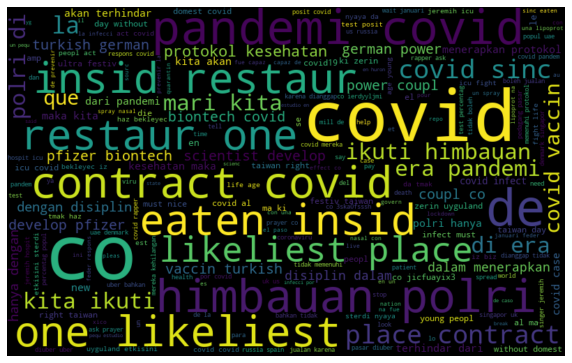

In [30]:
#Part-5: Visualization

#Word Cloud
all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Term Freuency - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweet_dataset['text'])
#Count Most Frequent Words
Counter = Counter(corpus)
most_occur = Counter.most_common(10) 
print(most_occur)